Client Segmentation & Retention Risk Prediction

In [141]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [142]:
data = pd.read_csv('./data/client_data_5000.csv')

In [143]:
data.head()

,client_id,client_name,policy_type,policy_start_date,annual_premium,claims_last_3_years,communication_frequency,client_tenure_years,last_contact_date,industry,region
0,1001,"Rodriguez, Figueroa and Sanchez",Commercial Auto,2022-04-09,4811.91,0,Annually,6,2024-06-17,Construction,Durham
1,1002,Doyle Ltd,Commercial Auto,2017-05-10,10243.22,3,Quarterly,9,2024-09-02,Construction,Durham
2,1003,"Mcclain, Miller and Henderson",Property,2020-01-30,12951.29,0,Quarterly,6,2024-07-02,Technology,Durham
3,1004,Davis and Sons,General Liability,2022-12-18,7442.15,3,Annually,3,2024-07-15,Manufacturing,Durham
4,1005,"Guzman, Hoffman and Baldwin",General Liability,2018-11-13,12113.78,2,Annually,4,2025-04-11,Construction,Durham


Data Cleaning

In [144]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   client_id                5000 non-null   int64  
 1   client_name              5000 non-null   object 
 2   policy_type              5000 non-null   object 
 3   policy_start_date        5000 non-null   object 
 4   annual_premium           5000 non-null   float64
 5   claims_last_3_years      5000 non-null   int64  
 6   communication_frequency  5000 non-null   object 
 7   client_tenure_years      5000 non-null   int64  
 8   last_contact_date        5000 non-null   object 
 9   industry                 5000 non-null   object 
 10  region                   5000 non-null   object 
dtypes: float64(1), int64(3), object(7)
memory usage: 429.8+ KB


In [145]:
data.describe()

,client_id,annual_premium,claims_last_3_years,client_tenure_years
count,5000.000000,5000.000000,5000.0000,5000.000000
mean,3500.500000,11457.539956,2.5052,5.436600
std,1443.520003,4880.053279,1.6971,2.917547
min,1001.000000,3003.330000,0.0000,1.000000
25%,2250.750000,7207.107500,1.0000,3.000000
50%,3500.500000,11458.950000,3.0000,5.000000
75%,4750.250000,15607.187500,4.0000,8.000000
max,6000.000000,19999.220000,5.0000,10.000000


In [146]:
data.isnull().sum()


client_id                  0
client_name                0
policy_type                0
policy_start_date          0
annual_premium             0
claims_last_3_years        0
communication_frequency    0
client_tenure_years        0
last_contact_date          0
industry                   0
region                     0
dtype: int64

In [147]:
data["policy_type"].value_counts()

policy_type
Cyber                 1018
Errors & Omissions    1016
Property               996
Commercial Auto        985
General Liability      985
Name: count, dtype: int64

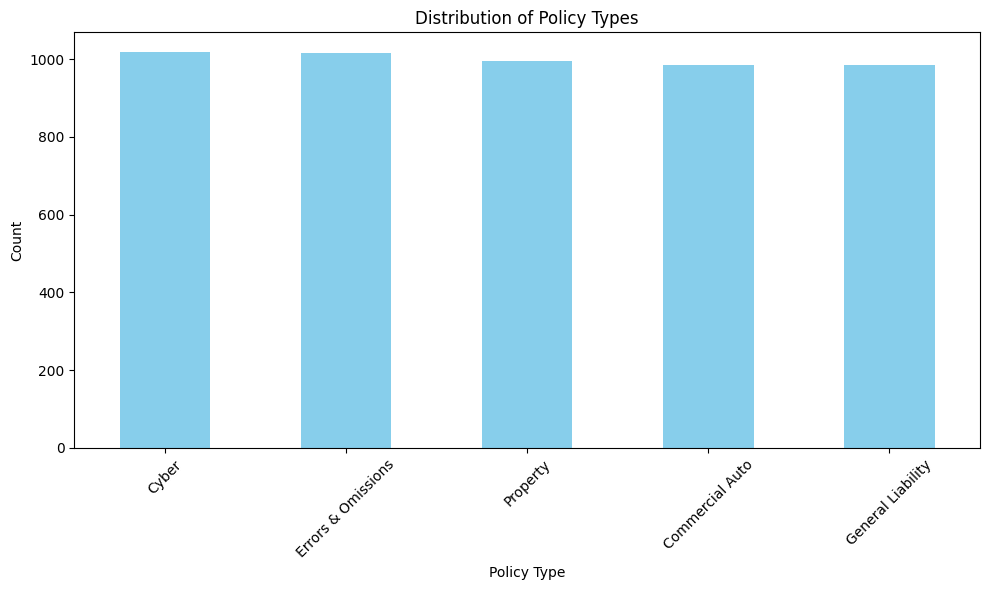

In [148]:
# 1. Distribution of policy types
plt.figure(figsize=(10, 6))
policy_counts = data['policy_type'].value_counts()
policy_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Policy Types')
plt.xlabel('Policy Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

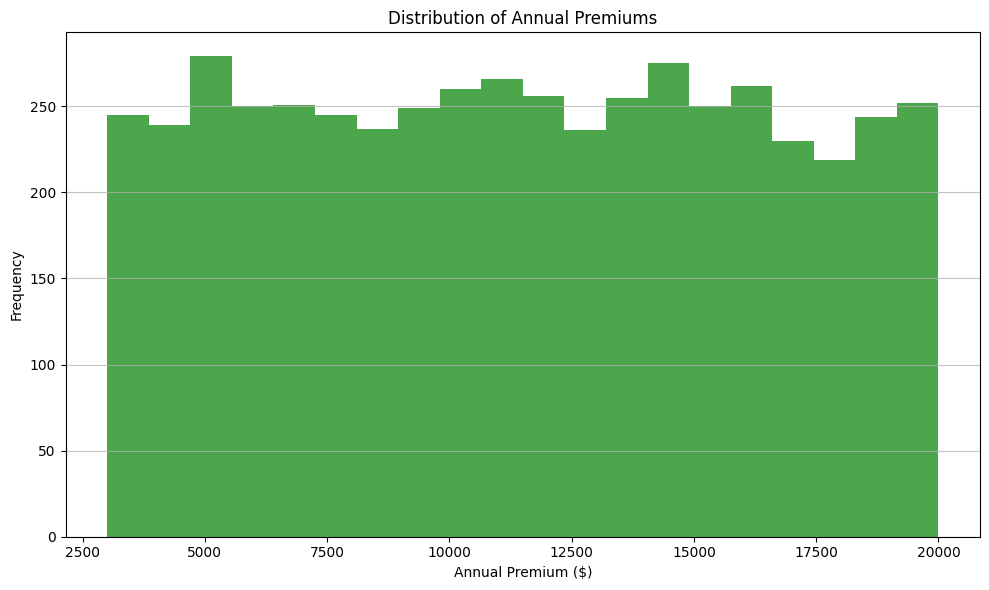

In [149]:
# 2. Annual premium distribution
plt.figure(figsize=(10, 6))
plt.hist(data['annual_premium'], bins=20, color='green', alpha=0.7)
plt.title('Distribution of Annual Premiums')
plt.xlabel('Annual Premium ($)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

In [150]:
data["claims_last_3_years"].value_counts()

claims_last_3_years
2    864
3    856
5    831
1    819
0    816
4    814
Name: count, dtype: int64

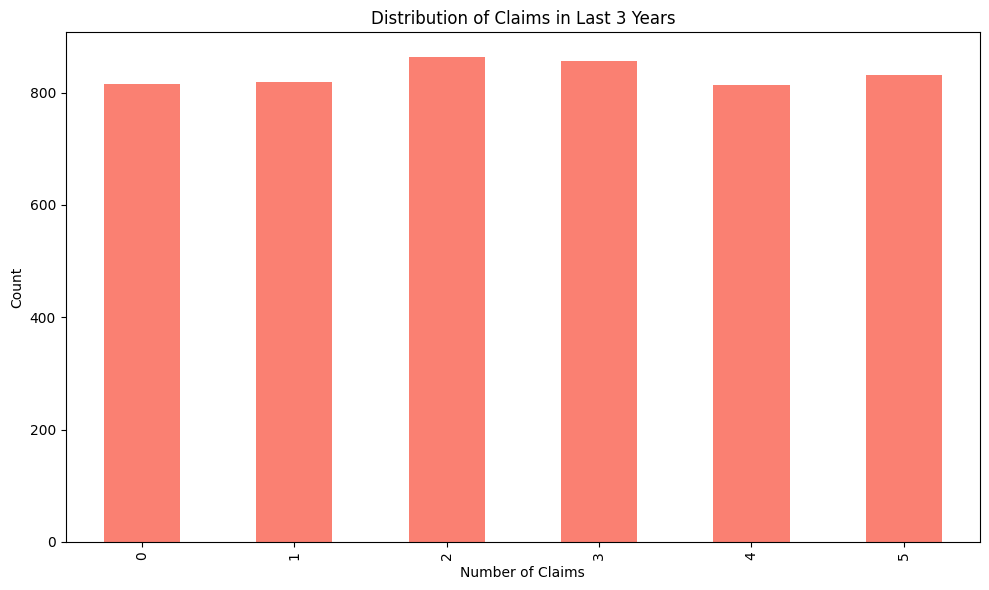

In [151]:
# 3. Claims distribution
plt.figure(figsize=(10, 6))
claims_counts = data['claims_last_3_years'].value_counts().sort_index()
claims_counts.plot(kind='bar', color='salmon')
plt.title('Distribution of Claims in Last 3 Years')
plt.xlabel('Number of Claims')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

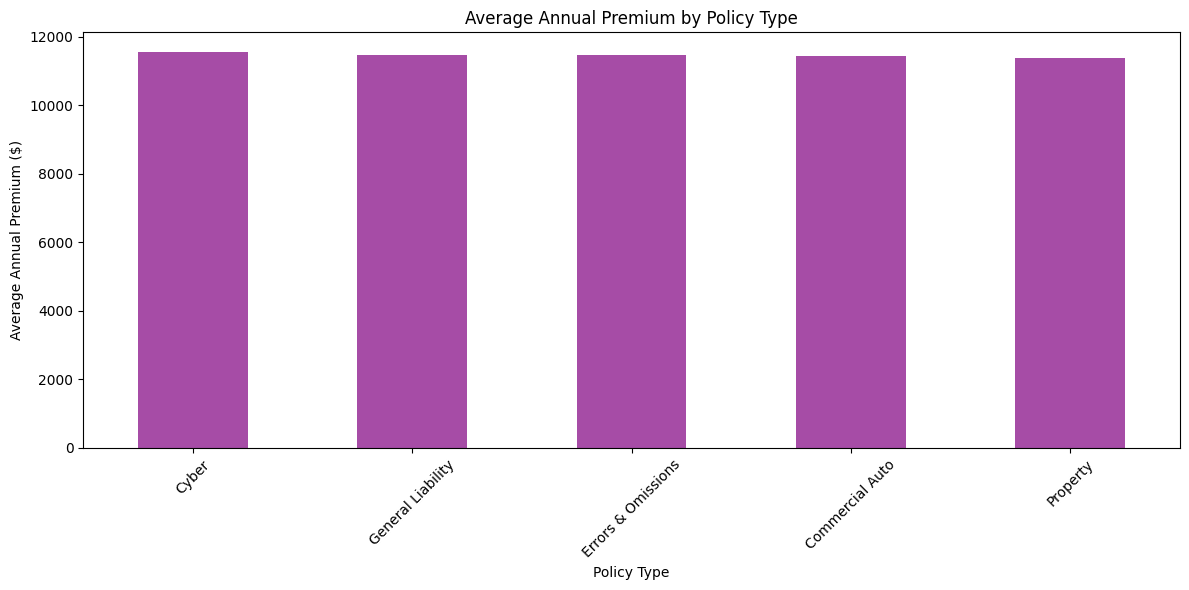

In [152]:
# 4. Average premium by policy type
plt.figure(figsize=(12, 6))
avg_premium_by_policy = data.groupby('policy_type')['annual_premium'].mean().sort_values(ascending=False)
avg_premium_by_policy.plot(kind='bar', color='purple', alpha=0.7)
plt.title('Average Annual Premium by Policy Type')
plt.xlabel('Policy Type')
plt.ylabel('Average Annual Premium ($)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

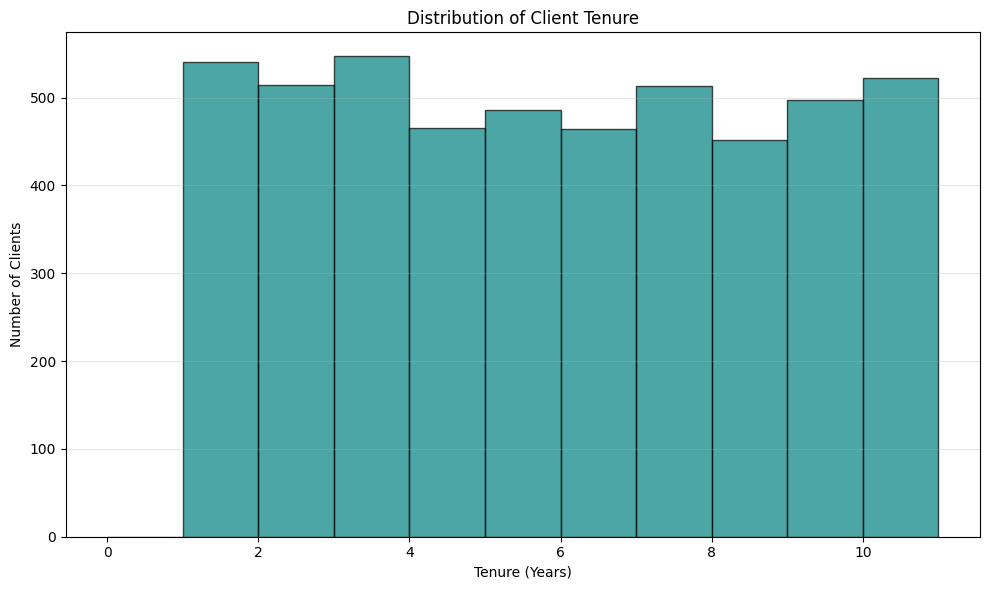

In [153]:
# 5. Client tenure distribution
plt.figure(figsize=(10, 6))
plt.hist(data['client_tenure_years'], bins=range(0, int(data['client_tenure_years'].max()) + 2), 
         color='teal', alpha=0.7, edgecolor='black')
plt.title('Distribution of Client Tenure')
plt.xlabel('Tenure (Years)')
plt.ylabel('Number of Clients')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

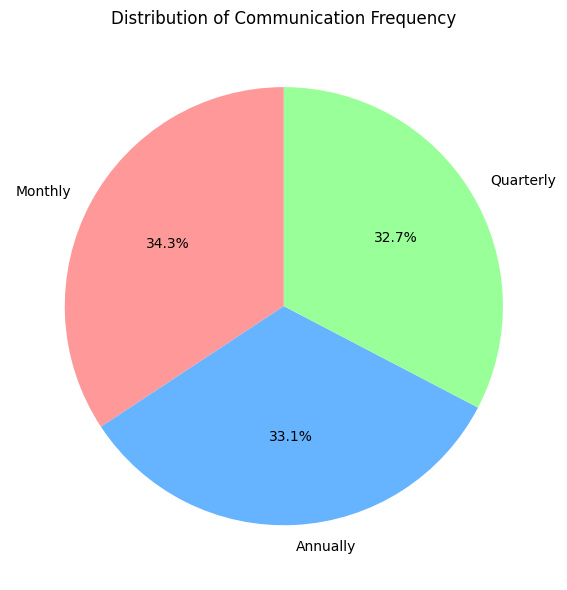

In [154]:
# 6. Communication frequency distribution
plt.figure(figsize=(10, 6))
comm_counts = data['communication_frequency'].value_counts()
comm_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, 
                 colors=['#ff9999','#66b3ff','#99ff99','#ffcc99'])
plt.title('Distribution of Communication Frequency')
plt.ylabel('')
plt.tight_layout()
plt.show()

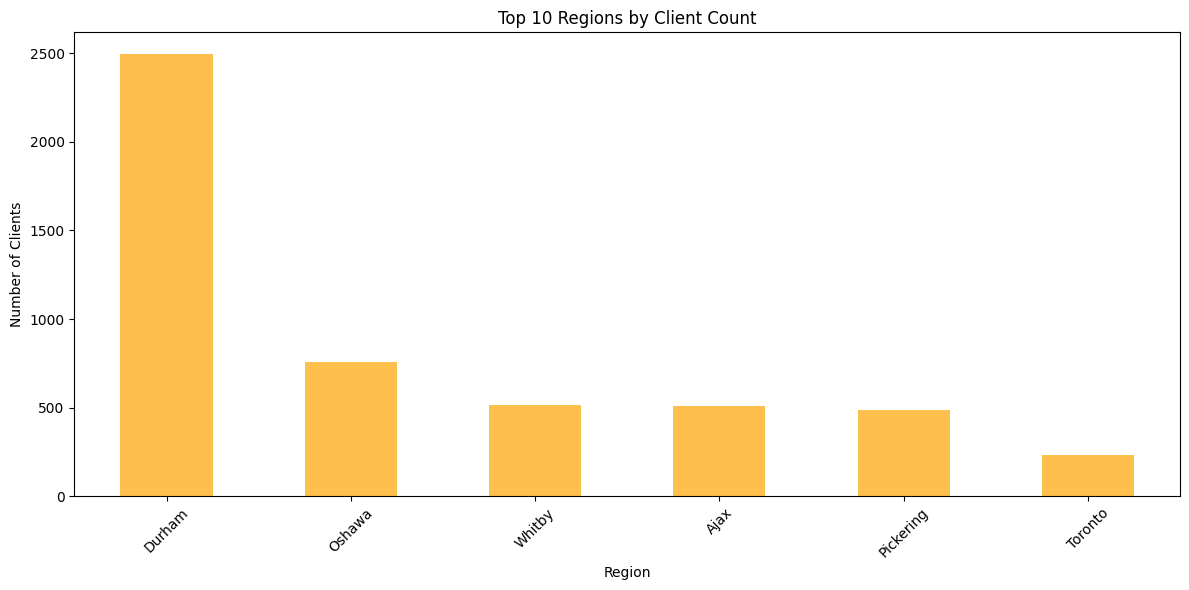

In [155]:
# 7. Region distribution
plt.figure(figsize=(12, 6))
region_counts = data['region'].value_counts().head(10)  # Top 10 regions
region_counts.plot(kind='bar', color='orange', alpha=0.7)
plt.title('Top 10 Regions by Client Count')
plt.xlabel('Region')
plt.ylabel('Number of Clients')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

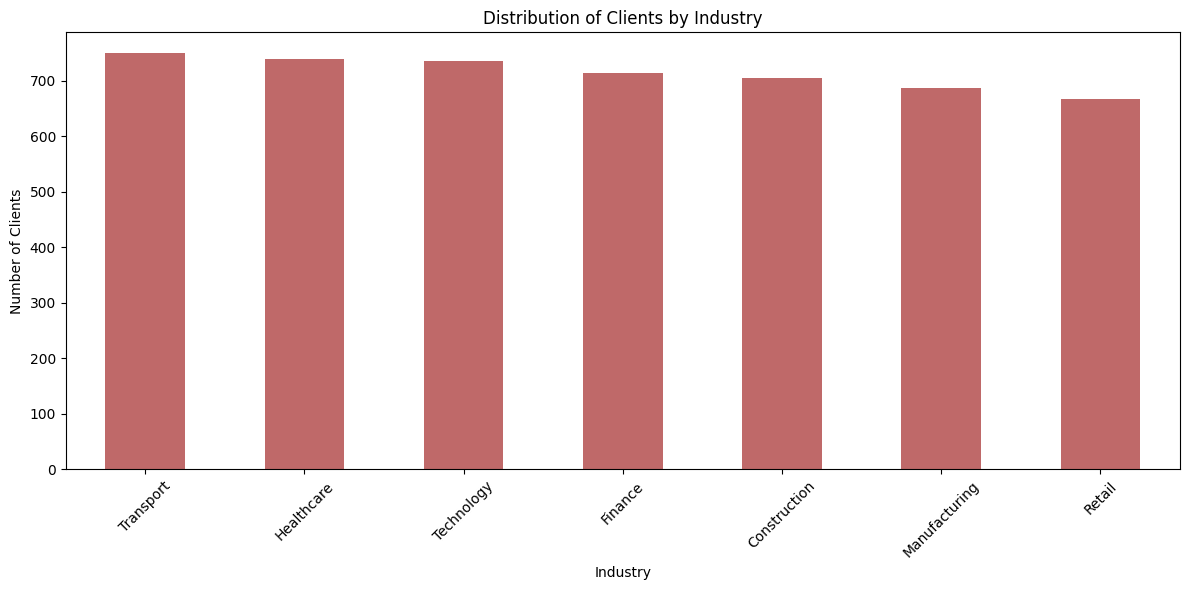

In [156]:
# 8. Industry distribution
plt.figure(figsize=(12, 6))
industry_counts = data['industry'].value_counts()
industry_counts.plot(kind='bar', color='brown', alpha=0.7)
plt.title('Distribution of Clients by Industry')
plt.xlabel('Industry')
plt.ylabel('Number of Clients')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

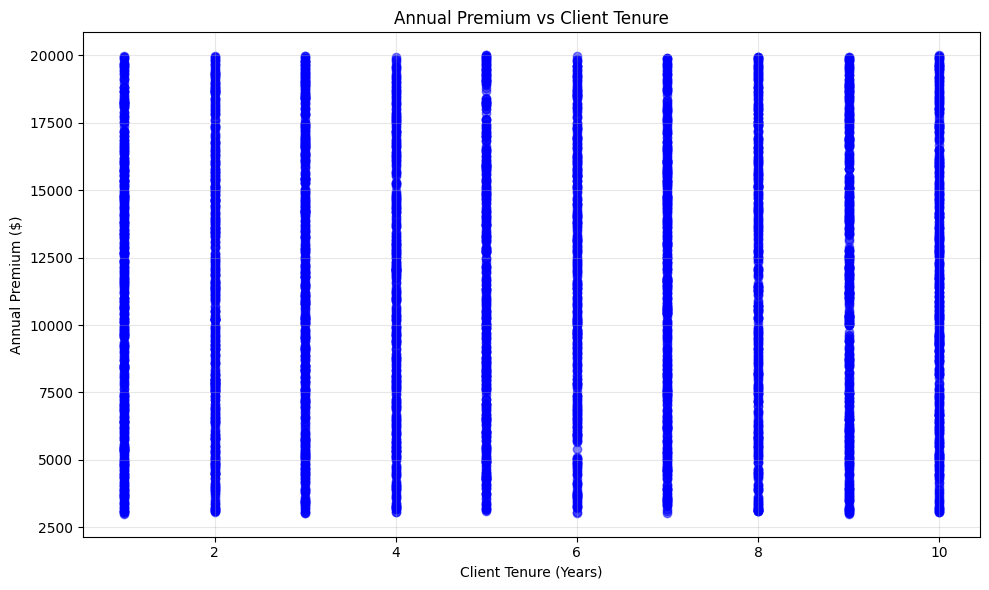

In [157]:
# 9. Scatter plot: Annual Premium vs Client Tenure
plt.figure(figsize=(10, 6))
plt.scatter(data['client_tenure_years'], data['annual_premium'], alpha=0.5, c='blue')
plt.title('Annual Premium vs Client Tenure')
plt.xlabel('Client Tenure (Years)')
plt.ylabel('Annual Premium ($)')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

<Figure size 1200x600 with 0 Axes>

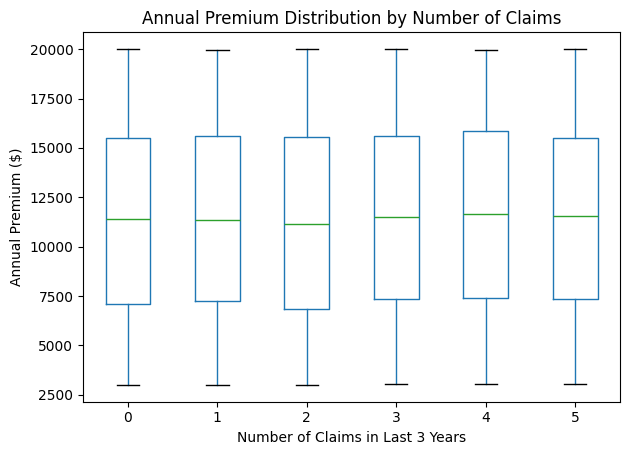

In [158]:
# 10. Box plot: Annual Premium by Number of Claims
plt.figure(figsize=(12, 6))
data.boxplot(column='annual_premium', by='claims_last_3_years', grid=False)
plt.title('Annual Premium Distribution by Number of Claims')
plt.suptitle('')  # Remove the default suptitle
plt.xlabel('Number of Claims in Last 3 Years')
plt.ylabel('Annual Premium ($)')
plt.tight_layout()
plt.show()

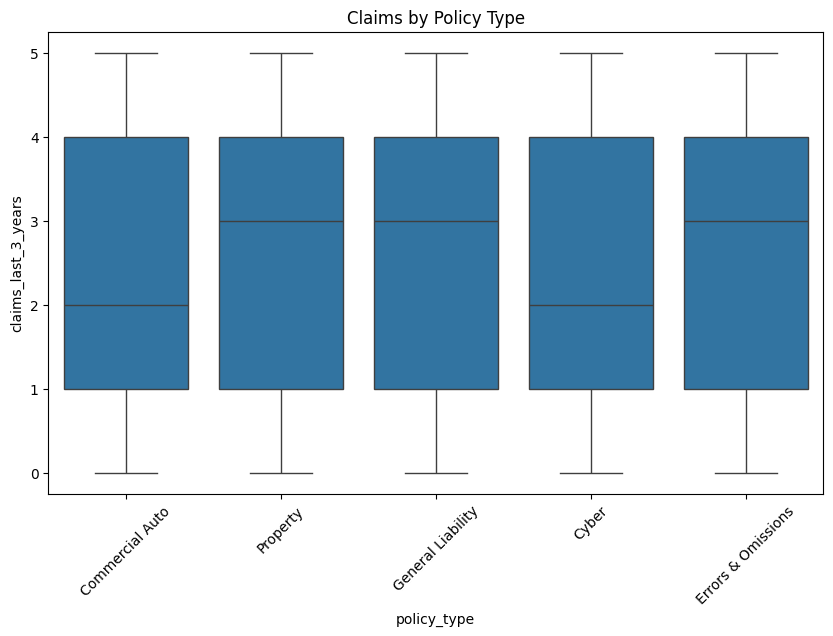

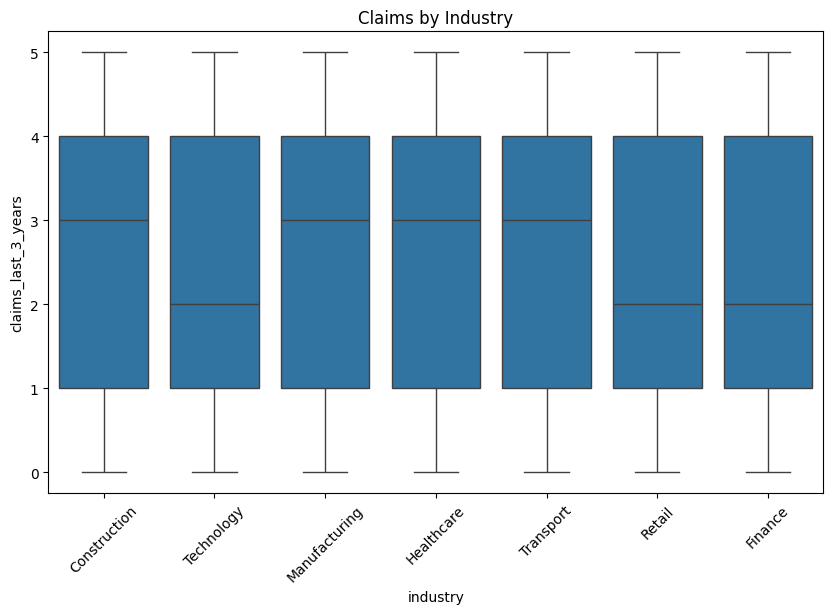

In [159]:
# Boxplot: Claims by Policy Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='policy_type', y='claims_last_3_years', data=data)
plt.title('Claims by Policy Type')
plt.xticks(rotation=45)
plt.show()

# Boxplot: Claims by Industry
plt.figure(figsize=(10, 6))
sns.boxplot(x='industry', y='claims_last_3_years', data=data)
plt.title('Claims by Industry')
plt.xticks(rotation=45)
plt.show()

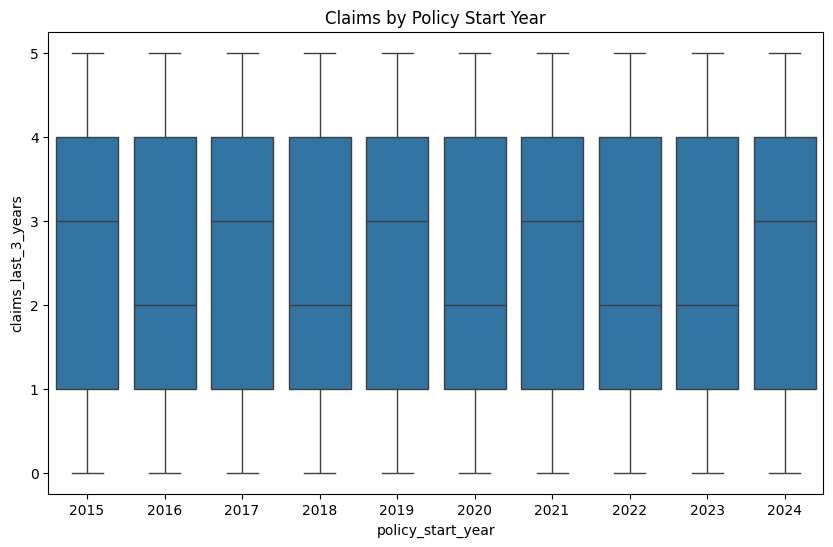

In [160]:
data['policy_start_year'] = pd.to_datetime(data['policy_start_date']).dt.year
plt.figure(figsize=(10, 6))
sns.boxplot(x='policy_start_year', y='claims_last_3_years', data=data)
plt.title('Claims by Policy Start Year')
plt.show()

In [161]:
df = data

In [162]:
df.columns

Index(['client_id', 'client_name', 'policy_type', 'policy_start_date',
       'annual_premium', 'claims_last_3_years', 'communication_frequency',
       'client_tenure_years', 'last_contact_date', 'industry', 'region',
       'policy_start_year'],
      dtype='object')

In [163]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   client_id                5000 non-null   int64  
 1   client_name              5000 non-null   object 
 2   policy_type              5000 non-null   object 
 3   policy_start_date        5000 non-null   object 
 4   annual_premium           5000 non-null   float64
 5   claims_last_3_years      5000 non-null   int64  
 6   communication_frequency  5000 non-null   object 
 7   client_tenure_years      5000 non-null   int64  
 8   last_contact_date        5000 non-null   object 
 9   industry                 5000 non-null   object 
 10  region                   5000 non-null   object 
 11  policy_start_year        5000 non-null   int32  
dtypes: float64(1), int32(1), int64(3), object(7)
memory usage: 449.3+ KB


In [164]:
# df["client_name"].value_counts()
# df[df["client_name"] == 'Miller Ltd']

### Data Preprocessing

converting str to datetime


In [165]:
df["policy_start_date"] = pd.to_datetime(df["policy_start_date"])
df["last_contact_date"] = pd.to_datetime(df["last_contact_date"])

In [166]:
# Calculate days since last contact using current date
import datetime
current_date = datetime.datetime.now()
df['days_since_last_contact'] = (current_date - df['last_contact_date']).dt.days

In [167]:
# Extract year from policy_start_date and create a new column
df['policy_start_year'] = df['policy_start_date'].dt.year
# Calculate new client tenure in years based on policy start year
current_year = datetime.datetime.now().year
df['new_client_tenure_year'] = current_year - df['policy_start_year']
df["new_client_tenure_year"] = df["new_client_tenure_year"].astype('Int64')


In [168]:
drop_columns = ['client_id', 'client_name','policy_type', 'policy_start_date', 'client_tenure_years', 'last_contact_date', 'policy_start_year']
df = df.drop(columns=drop_columns)

In [169]:
df.head()

,annual_premium,claims_last_3_years,communication_frequency,industry,region,days_since_last_contact,new_client_tenure_year
0,4811.91,0,Annually,Construction,Durham,316,3
1,10243.22,3,Quarterly,Construction,Durham,239,8
2,12951.29,0,Quarterly,Technology,Durham,301,5
3,7442.15,3,Annually,Manufacturing,Durham,288,3
4,12113.78,2,Annually,Construction,Durham,18,7


In [170]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   annual_premium           5000 non-null   float64
 1   claims_last_3_years      5000 non-null   int64  
 2   communication_frequency  5000 non-null   object 
 3   industry                 5000 non-null   object 
 4   region                   5000 non-null   object 
 5   days_since_last_contact  5000 non-null   int64  
 6   new_client_tenure_year   5000 non-null   Int64  
dtypes: Int64(1), float64(1), int64(2), object(3)
memory usage: 278.4+ KB


In [171]:
df["communication_frequency"].value_counts()

communication_frequency
Monthly      1714
Annually     1653
Quarterly    1633
Name: count, dtype: int64

In [172]:
df["communication_frequency"].value_counts()


communication_frequency
Monthly      1714
Annually     1653
Quarterly    1633
Name: count, dtype: int64

In [173]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df["communication_frequency"] = label_encoder.fit_transform(df["communication_frequency"])
df["communication_frequency"].value_counts()

# Apply label encoding to industry and region columns
df["industry"] = label_encoder.fit_transform(df["industry"])
df["region"] = label_encoder.fit_transform(df["region"])

df.head()

,annual_premium,claims_last_3_years,communication_frequency,industry,region,days_since_last_contact,new_client_tenure_year
0,4811.91,0,0,0,1,316,3
1,10243.22,3,2,0,1,239,8
2,12951.29,0,2,5,1,301,5
3,7442.15,3,0,3,1,288,3
4,12113.78,2,0,0,1,18,7


In [174]:
df["communication_frequency"].value_counts()
#0 - Annually
#1 - Monthly
#2 - Quarterly

communication_frequency
1    1714
0    1653
2    1633
Name: count, dtype: int64

## No multicolinearity exist!!

In [175]:
# # Calculate correlation matrix
# correlation_matrix = df.corr()

# # Create a heatmap for better visualization
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(10, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
# plt.title('Correlation Matrix of Features')
# plt.tight_layout()
# plt.show()

# # Find the most correlated features
# print("\nMost correlated feature pairs:")
# # Unstack the correlation matrix and sort it
# corr_pairs = correlation_matrix.unstack()
# # Sort correlation pairs in descending order
# sorted_pairs = corr_pairs.sort_values(kind="quicksort", ascending=False)
# # Remove self-correlations (which are always 1)
# high_corr = sorted_pairs[sorted_pairs < 1.0]
# print(high_corr.head(10))  # Print top 10 correlations


In [176]:

df.describe()

,annual_premium,claims_last_3_years,communication_frequency,industry,region,days_since_last_contact,new_client_tenure_year
count,5000.000000,5000.0000,5000.00000,5000.000000,5000.000000,5000.000000,5000.0
mean,11457.539956,2.5052,0.99600,3.020400,1.797000,190.448200,5.7954
std,4880.053279,1.6971,0.81075,2.015439,1.442154,106.623837,2.611303
min,3003.330000,0.0000,0.00000,0.000000,0.000000,6.000000,1.0
25%,7207.107500,1.0000,0.00000,1.000000,1.000000,97.000000,4.0
50%,11458.950000,3.0000,1.00000,3.000000,1.000000,192.000000,6.0
75%,15607.187500,4.0000,2.00000,5.000000,2.000000,283.000000,8.0
max,19999.220000,5.0000,2.00000,6.000000,5.000000,371.000000,10.0


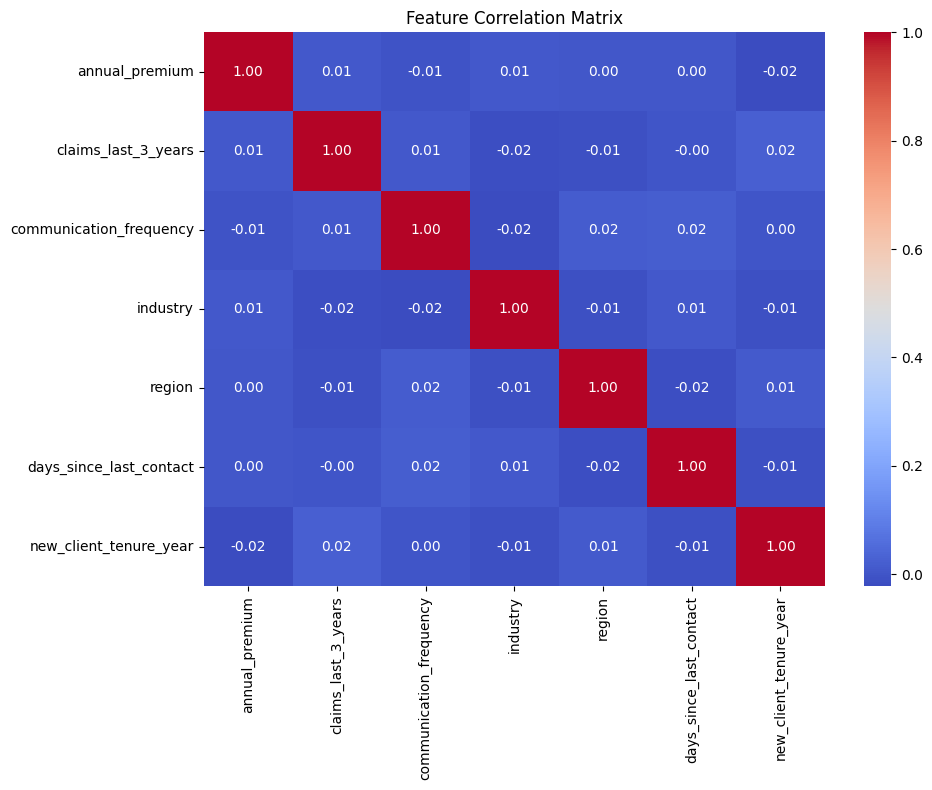

,annual_premium,claims_last_3_years,communication_frequency,industry,region,days_since_last_contact,new_client_tenure_year
0,4811.91,0,0,0,1,316,3
1,10243.22,3,2,0,1,239,8
2,12951.29,0,2,5,1,301,5
3,7442.15,3,0,3,1,288,3
4,12113.78,2,0,0,1,18,7


In [177]:
# Calculate correlation matrix for the remaining features
correlation_matrix = df.corr()
# print("Correlation matrix:")
# print(correlation_matrix)

# Visualize the correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Display the first few rows of the dataframe
df.head()

condition for target column


In [178]:
df['churn_risk'] = (
    (df['claims_last_3_years'] == 0) &
    (df['annual_premium'] > df['annual_premium'].quantile(0.75))
    # (df['days_since_last_contact'] > 200)
).astype(int)

In [179]:
df.head()

,annual_premium,claims_last_3_years,communication_frequency,industry,region,days_since_last_contact,new_client_tenure_year,churn_risk
0,4811.91,0,0,0,1,316,3,0
1,10243.22,3,2,0,1,239,8,0
2,12951.29,0,2,5,1,301,5,0
3,7442.15,3,0,3,1,288,3,0
4,12113.78,2,0,0,1,18,7,0


In [180]:
df["churn_risk"].value_counts()

churn_risk
0    4799
1     201
Name: count, dtype: int64

In [181]:
df = df.drop(columns=['claims_last_3_years', 'annual_premium'])

Correlation matrix:
                         communication_frequency  industry    region  \
communication_frequency                 1.000000 -0.022108  0.017270   
industry                               -0.022108  1.000000 -0.011032   
region                                  0.017270 -0.011032  1.000000   
days_since_last_contact                 0.020079  0.007142 -0.015962   
new_client_tenure_year                  0.001314 -0.010876  0.012607   
churn_risk                             -0.010294 -0.004093  0.020337   

                         days_since_last_contact  new_client_tenure_year  \
communication_frequency                 0.020079                0.001314   
industry                                0.007142               -0.010876   
region                                 -0.015962                0.012607   
days_since_last_contact                 1.000000               -0.010661   
new_client_tenure_year                 -0.010661                1.000000   
churn_risk         

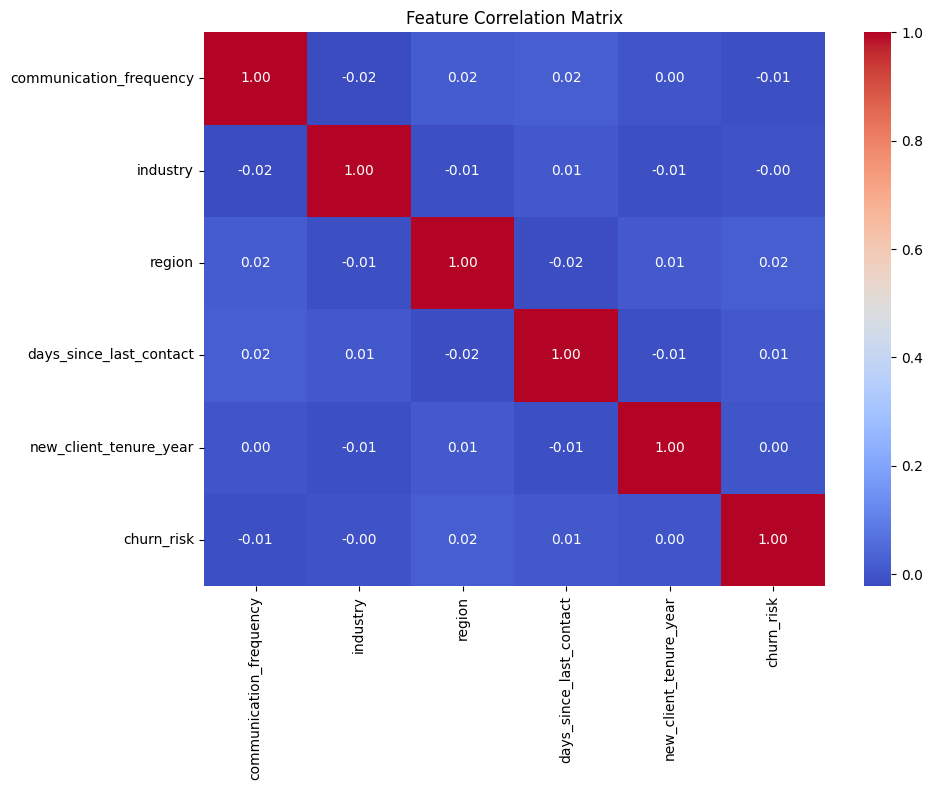

,communication_frequency,industry,region,days_since_last_contact,new_client_tenure_year,churn_risk
0,0,0,1,316,3,0
1,2,0,1,239,8,0
2,2,5,1,301,5,0
3,0,3,1,288,3,0
4,0,0,1,18,7,0


In [182]:
# Calculate correlation matrix for the remaining features
correlation_matrix = df.corr()
print("Correlation matrix:")
print(correlation_matrix)

# Visualize the correlation matrix
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Feature Correlation Matrix')
plt.tight_layout()
plt.show()

# Display the first few rows of the dataframe
df.head()

In [183]:
X = df.drop(columns='churn_risk')
y = df['churn_risk']

In [184]:
X.head()

,communication_frequency,industry,region,days_since_last_contact,new_client_tenure_year
0,0,0,1,316,3
1,2,0,1,239,8
2,2,5,1,301,5
3,0,3,1,288,3
4,0,0,1,18,7


In [185]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [186]:
y_train.value_counts()

churn_risk
0    3839
1     161
Name: count, dtype: int64

In [187]:
y_test.value_counts()

churn_risk
0    960
1     40
Name: count, dtype: int64

In [188]:
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import shap
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, brier_score_loss, classification_report, roc_auc_score, roc_curve, precision_score, recall_score
from sklearn.metrics import precision_recall_curve, auc

In [189]:
# cat_model = CatBoostClassifier(auto_class_weights='Balanced', random_state=42)
xgb_model = XGBClassifier()
rf_model = RandomForestClassifier()
dt_model = DecisionTreeClassifier()

In [190]:
cat_model = CatBoostClassifier(
    iterations=800,
    learning_rate=0.01,
    depth=4,
    early_stopping_rounds=50,
    scale_pos_weight=(3926/74),
    verbose=0,
    random_state=42
)


In [191]:
# Create a list of models to evaluate
models = {
    'CatBoost': cat_model,
    'XGBoost': xgb_model,
    'Random Forest': rf_model,
    'Decision Tree': dt_model
}

# Initialize a DataFrame to store evaluation metrics
results_df = pd.DataFrame(columns=['Model', 'Train-Accuracy', 'Train-Precision', 'Train-Recall', 'Train-F1-Score', 'Train-AUC-ROC','Train-PR-AUC', 'Test-Accuracy', 'Test-Precision', 'Test-Recall', 'Test-F1-Score', 'Test-AUC-ROC', 'Test-PR-AUC'])

# Train and evaluate each model
for name, model in models.items():
    print(f"Training and evaluating {name}...")
    
    # Train the model
    if name == 'CatBoost':
        model.fit(X_train, y_train, verbose=False)
    else:
        model.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = model.predict(X_train)
    y_train_pred_proba = model.predict_proba(X_train)
    y_test_pred = model.predict(X_test)
    y_test_pred_proba = model.predict_proba(X_test)
    
    # Calculate metrics
    # Calculate metrics for training data
    train_accuracy = accuracy_score(y_train, y_train_pred)
    train_precision = precision_score(y_train, y_train_pred)
    train_recall = recall_score(y_train, y_train_pred)
    train_f1 = f1_score(y_train, y_train_pred)
    train_auc_roc = roc_auc_score(y_train, y_train_pred_proba[:,1])
    # Calculate PR curve and AUC for train set
    precision_train, recall_train, _ = precision_recall_curve(y_train, y_train_pred_proba[:, 1])
    pr_auc_train = auc(recall_train, precision_train)

    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred)
    test_recall = recall_score(y_test, y_test_pred)
    test_f1 = f1_score(y_test, y_test_pred)
    test_auc_roc = roc_auc_score(y_test, y_test_pred_proba[:,1])
    # Calculate PR curve and AUC for test set
    precision_test, recall_test, _ = precision_recall_curve(y_test, y_test_pred_proba[:, 1])
    pr_auc_test = auc(recall_test, precision_test)
    
    # Add results to DataFrame
    results_df = pd.concat([results_df, pd.DataFrame({
        'Model': [name],
        'Train-Accuracy': [train_accuracy],
        'Train-Precision': [train_precision],
        'Train-Recall': [train_recall],
        'Train-F1-Score': [train_f1],
        'Train-AUC-ROC': [train_auc_roc],
        'Train-PR-AUC': [pr_auc_train],

        'Test-Accuracy': [test_accuracy],
        'Test-Precision': [test_precision],
        'Test-Recall': [test_recall],
        'Test-F1-Score': [test_f1],
        'Test-AUC-ROC': [test_auc_roc],
        'Test-PR-AUC': [pr_auc_test]
    })], ignore_index=True)
    
    # # Print classification report
    # print(f"\nClassification Report for {name}:")
    # print(classification_report(y_test, y_test_pred))


Training and evaluating CatBoost...


C:\Users\dp971\AppData\Local\Temp\ipykernel_18384\1728234405.py:49: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  results_df = pd.concat([results_df, pd.DataFrame({


Training and evaluating XGBoost...
Training and evaluating Random Forest...
Training and evaluating Decision Tree...


In [192]:
results_df

,Model,Train-Accuracy,Train-Precision,Train-Recall,Train-F1-Score,Train-AUC-ROC,Train-PR-AUC,Test-Accuracy,Test-Precision,Test-Recall,Test-F1-Score,Test-AUC-ROC,Test-PR-AUC
0,CatBoost,0.30200,0.054521,1.000000,0.103404,0.867300,0.278546,0.285,0.043302,0.800,0.082157,0.542161,0.072448
1,XGBoost,0.97225,1.000000,0.310559,0.473934,0.993635,0.901378,0.959,0.333333,0.025,0.046512,0.573516,0.090675
2,Random Forest,0.99950,1.000000,0.987578,0.993750,0.999997,0.999923,0.959,0.000000,0.000,0.000000,0.555951,0.053190
3,Decision Tree,0.99950,1.000000,0.987578,0.993750,0.999997,0.999924,0.920,0.115385,0.150,0.130435,0.550156,0.147876


In [195]:
# Predict risk scores 
data['risk_score'] = model.predict_proba(X)[:, 1]
print(data['risk_score'].value_counts())
print()

# Select top 10 high-risk clients
top_10_risk = data[['client_id', 'client_name', 'policy_type', 'policy_start_date',
       'annual_premium', 'claims_last_3_years', 'communication_frequency',
       'client_tenure_years', 'last_contact_date', 'industry', 'region',
       'days_since_last_contact', 'policy_start_year',
       'new_client_tenure_year', 'risk_score']].sort_values(by='risk_score', ascending=False).head(10)

print("Top 10 Clients at Risk of Not Renewing:")
top_10_risk

# Define a risk threshold (clients with risk score above this are considered high-risk)
risk_threshold = 0.5
high_risk_clients = data[data['risk_score'] >= risk_threshold]

# Filter for clients predicted to churn (based on the model's prediction)
churning_clients = high_risk_clients[high_risk_clients['risk_score'] >= 0.5]

# Calculate total potential premium loss from clients likely to churn
total_premium_loss = churning_clients['annual_premium'].sum()

print(f"\nTotal Potential Premium Loss from Clients Likely to Churn: ${total_premium_loss:,.2f}")
print(f"Number of Clients Likely to Churn: {len(churning_clients)}")

# Calculate average risk score and premium for churning clients
avg_risk_score = churning_clients['risk_score'].mean()
avg_premium = churning_clients['annual_premium'].mean()

# Show distribution of churning clients by policy type
policy_type_counts = churning_clients['policy_type'].value_counts()
print("\nChurning Clients by Policy Type:")
print(policy_type_counts)

def get_confidence_level(risk_score):
    if risk_score >= 0.8:
        return "Very High"
    elif risk_score >= 0.6:
        return "High"
    elif risk_score >= 0.4:
        return "Medium"
    elif risk_score >= 0.2:
        return "Low"
    else:
        return "Very Low"

# Apply the function to create a new column
data['confidence_level'] = data['risk_score'].apply(get_confidence_level)

# Add confidence levels to the top 10 risk clients
top_10_risk['confidence_level'] = top_10_risk['risk_score'].apply(get_confidence_level)

# Display confidence level distribution
print("\nConfidence Level Distribution:")
print(data['confidence_level'].value_counts())


risk_score
0.0    4783
1.0     211
0.5       6
Name: count, dtype: int64

Top 10 Clients at Risk of Not Renewing:

Total Potential Premium Loss from Clients Likely to Churn: $3,524,332.47
Number of Clients Likely to Churn: 217

Churning Clients by Policy Type:
policy_type
Property              55
Errors & Omissions    51
Cyber                 42
Commercial Auto       37
General Liability     32
Name: count, dtype: int64

Confidence Level Distribution:
confidence_level
Very Low     4783
Very High     211
Medium          6
Name: count, dtype: int64


In [201]:
# Display top 10 high-risk clients with key information
top_10_risk[['client_id', 'client_name', 'policy_type', 'policy_start_date', 'annual_premium', 'industry', 'region']]

,client_id,client_name,policy_type,policy_start_date,annual_premium,industry,region
1009,2010,Weaver-Thompson,Property,2020-11-13,18772.43,Construction,Durham
2045,3046,Baldwin Group,Commercial Auto,2016-03-21,5474.47,Manufacturing,Durham
215,1216,"Carlson, Hooper and Wall",Cyber,2019-03-09,17262.52,Healthcare,Pickering
1421,2422,Maldonado-Mosley,Cyber,2020-11-12,16272.43,Technology,Pickering
419,1420,Thompson Ltd,Property,2017-09-05,16103.55,Technology,Oshawa
1768,2769,Edwards-Roth,Cyber,2021-11-02,18027.64,Construction,Durham
1203,2204,Alvarado-Davidson,Errors & Omissions,2018-12-20,18923.50,Healthcare,Oshawa
2046,3047,Hughes-Smith,Property,2018-10-11,15685.37,Healthcare,Durham
702,1703,Burgess Group,Property,2019-04-05,19656.48,Transport,Whitby
325,1326,"Martinez, Richardson and Curry",Commercial Auto,2016-05-10,16545.05,Construction,Durham
